In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Lê o arquivo CSV
tabela = pd.read_csv('diabetes_prediction_dataset.csv')
# Mostra as 5 primeiras linhas da tabela
tabela.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Ao analizarmos as primeiras linhas da tabela de dados que utilizaremos para treinar nosso modelo, nos deparamos com duas colunas que requerem especial atenção: gender e smoking_history.
Ambas as colunas possuem valores não númericos e portanto devem ser tratadas antes da utilização.
A coluna 'gender' pode ser tratada de maneira simples, substituindo a coluna 'gender' por duas colunas 'male' e 'female' e preenchendo os valores de acordo com os valores na coluna original.

In [7]:
# Converte as informações da coluna gênero para um valor binário
tabela['gender'] = tabela['gender'].map({'Female': 1, 'Male': 0})

tabela.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,never,25.19,6.6,140,0
1,1.0,54.0,0,0,No Info,27.32,6.6,80,0
2,0.0,28.0,0,0,never,27.32,5.7,158,0
3,1.0,36.0,0,0,current,23.45,5.0,155,0
4,0.0,76.0,1,1,current,20.14,4.8,155,0


In [8]:
tabela['gender'].isna().sum()

np.int64(18)

Como existem apenas 18 linhas não preenchidas na categoria 'gender', não há uma perda expressiva ao removê-las

In [9]:
tabela = tabela[~tabela['gender'].isna()]
tabela['gender'].isna().sum()

np.int64(0)

In [10]:
tabela.rename(columns={'gender': 'female'}, inplace=True)
tabela['male'] = 1 - tabela['female']
tabela.head()

,female,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,male
0,1.0,80.0,0,1,never,25.19,6.6,140,0,0.0
1,1.0,54.0,0,0,No Info,27.32,6.6,80,0,0.0
2,0.0,28.0,0,0,never,27.32,5.7,158,0,1.0
3,1.0,36.0,0,0,current,23.45,5.0,155,0,0.0
4,0.0,76.0,1,1,current,20.14,4.8,155,0,1.0


In [11]:
# Move a coluna male para o inicio da tabela
cols = tabela.columns.tolist()

cols.remove('male')

cols.insert(1, 'male')

tabela = tabela[cols]
tabela.head()

,female,male,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,0.0,80.0,0,1,never,25.19,6.6,140,0
1,1.0,0.0,54.0,0,0,No Info,27.32,6.6,80,0
2,0.0,1.0,28.0,0,0,never,27.32,5.7,158,0
3,1.0,0.0,36.0,0,0,current,23.45,5.0,155,0
4,0.0,1.0,76.0,1,1,current,20.14,4.8,155,0


O segundo caso exige um pouco de maior cautela, a gama de valores presentes na coluna 'smoking_history' é maior, não é possível mapeá-los para valores binários.
Os possíveis valores presentes nesta coluna são: never, former, current, not current e No Info.
Todos estes valores, com exceção do último, devem ser mapeados para valores númericos.

In [12]:
# Converte informações na coluna smoking_history
tabela['smoking_history'] = tabela['smoking_history'].map({'never': 0, 'former': 1, 'not current': 2, 'current': 3})
tabela.head()

,female,male,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,0.0,80.0,0,1,0.0,25.19,6.6,140,0
1,1.0,0.0,54.0,0,0,NaN,27.32,6.6,80,0
2,0.0,1.0,28.0,0,0,0.0,27.32,5.7,158,0
3,1.0,0.0,36.0,0,0,3.0,23.45,5.0,155,0
4,0.0,1.0,76.0,1,1,3.0,20.14,4.8,155,0


In [13]:
# Conta ocorrencias de NaN na coluna smoking_history
tabela['smoking_history'].isna().sum()

np.int64(39813)

Como existem 39813 células sem informação na coluna 'smoking_history', não podemos simplesmente ignorar tais linhas, seria uma perda expressiva de nossa base de dados. As informações contidas nessa coluna são de extrema relevância para o treinamento do modelo, visto que, o histórico em tabagismo aumenta as chances de desenvolver diabetes tipo 2. Portanto, a coluna não pode ser descartada por inteiro. Além disso, existem muitos valores não preenchidos, descartar tais linhas geraria uma enorme perda em nossos dados. Nos resta então apenas uma opção: preencher os dados ausentes da coluna.

A estratégia de preenchimento adotada será a utilização da média de todos os valores existentes na coluna.

In [14]:
media_tabagismo = int(round(tabela['smoking_history'].mean()))
tabela['smoking_history'] = tabela['smoking_history'].fillna(media_tabagismo)
tabela['smoking_history'].isna().sum()

np.int64(0)

Agora, com o tratamento de dados feito para as colunas 'gender' e 'smoking_history', torna-se evidente outro obstáculo em nossos dados: A variação de valores entre colunas pode gerar distorções no aprendizado. Como algumas colunas apresentam valores binários e outras variam em determinados intervalos, o melhor a se fazer é normalizar todas as colunas, assim, todos os valores na tabela estarão entre 0 e 1.

In [15]:
normalizar = ['age', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for col in normalizar:
    tabela[col] = (tabela[col] - tabela[col].min()) / (tabela[col].max() - tabela[col].min())
tabela.head()

,female,male,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,0.0,1.000000,0,1,0.000000,0.177171,0.563636,0.272727,0
1,1.0,0.0,0.674675,0,0,0.333333,0.202031,0.563636,0.000000,0
2,0.0,1.0,0.349349,0,0,0.000000,0.202031,0.400000,0.354545,0
3,1.0,0.0,0.449449,0,0,1.000000,0.156863,0.272727,0.340909,0
4,0.0,1.0,0.949950,1,1,1.000000,0.118231,0.236364,0.340909,0


In [18]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    W1 = np.random.randn(n_h, n_x) * 0.001
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.001
    b2 = np.zeros((n_y, 1))

    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [19]:
def feed_forward(X, parameters):
    """
    Argument:
    X -- dados de input de tamanho  (n_x, m)
    parameters -- Dicionario python com nossos parametros (saída da função de inicialização)

    Returns:
    A2 -- A saída sigmóide da segunda ativação
    cache -- um dicionário contendo "Z1", "A1", "Z2" e "A2"
    """

    Z1 = np.dot(parameters["W1"], X) + parameters["b1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["W2"], A1) + parameters["b2"]
    A2 = sigmoid(Z2)

    assert (A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [20]:
def compute_cost(A2, Y, parameters):
    """
    Calcula o custo de entropia cruzada dado na equação (13)

    Arguments:
    A2 - A saída sigmóide da segunda ativação, de formato (1, número de observações)
    Y - vetor de forma de rótulos "verdadeiros" (1, número de observações)
    parâmetros - dicionário python contendo seus parâmetros W1, b1, W2 e b2

    Returns:
    cost -- custo de entropia cruzada dada a equação (13)
    """

    m = Y.shape[1]

    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = - np.sum(logprobs) / m

    cost = np.squeeze(cost)
    assert (isinstance(cost, float))

    return cost

In [21]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implemente a backward propagation usando as instruções acima.

    Arguments:
     parameters - dicionário python contendo os parâmetros
     cache -- um dicionário contendo "Z1", "A1", "Z2" e "A2".
     X – dados de entrada da forma (2, número de observações)
     Y - vetor de forma de rótulos "verdadeiros" (1, número de observações)

    Returns:
    grads -- dicionário python contendo seus gradientes em relação a diferentes parâmetros
    """
    m = X.shape[1]

    dZ2 = cache["A2"] - Y
    dW2 = (1 / m) * np.dot(dZ2, cache["A1"].T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(parameters["W2"].T, dZ2) * (1 - np.power(cache["A1"], 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [22]:
def layer_sizes(X, Y):
    """
    Arguments:
    X – conjunto de dados de entrada de forma (tamanho de entrada, número de observações)
    Y – rótulos de forma (tamanho de saída, número de observações)

    Returns:
    n_x – o tamanho da camada de entrada
    n_h – o tamanho da camada oculta
    n_y – o tamanho da camada de saída
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [23]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Atualiza os parâmetros usando a regra de atualização de gradiente descendente

    Arguments:
    parameters – dicionário python contendo seus parâmetros
    grads – dicionário python contendo seus gradientes

    Returns:
    parameters – dicionário python contendo seus parâmetros atualizados
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    W1 = W1 - (learning_rate * grads["dW1"])
    b1 = b1 - (learning_rate * grads["db1"])
    W2 = W2 - (learning_rate * grads["dW2"])
    b2 = b2 - (learning_rate * grads["db2"])

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [24]:
def sigmoid(x):
    """
    Calcular o sigmóide de x

    Arguments:
    x -- Uma matriz escalar ou numpy de qualquer tamanho.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [25]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    Arguments:
    X - conjunto de dados de forma (categorias, número de observações)
    Y - rótulos de forma (1, número de observações)
    n_h – tamanho da camada oculta
    num_iterations -- Número de iterações no loop de descida gradiente
    print_cost -- se True, imprime o custo a cada 1000 iterações

    Returns:
    parameters -- parâmetros aprendidos pelo modelo. Eles podem então ser usados para prever.
    """

    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    for i in range(0, num_iterations):
        A2, cache = feed_forward(X, parameters)

        cost = compute_cost(A2, Y, parameters)

        grads = backward_propagation(parameters, cache, X, Y)

        parameters = update_parameters(parameters, grads, learning_rate=0.05)

        if print_cost and i % 1000 == 0:
            print("Custo após a interação %i: %f" % (i, cost))

    return parameters

In [26]:
# Inicializa random do numpy
np.random.seed()

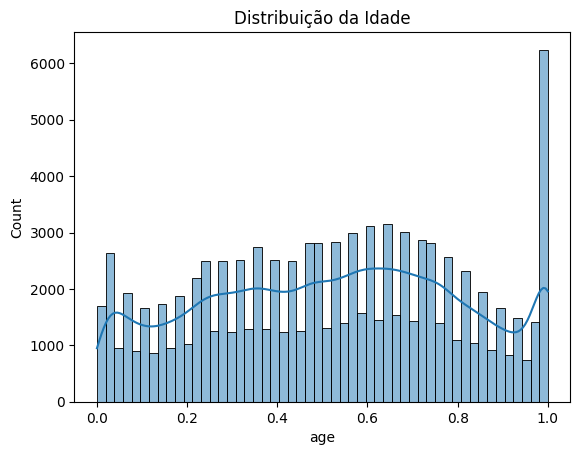

In [27]:
# Histograma da idade
sns.histplot(data=tabela, x='age', kde=True)
plt.title('Distribuição da Idade')
plt.show()

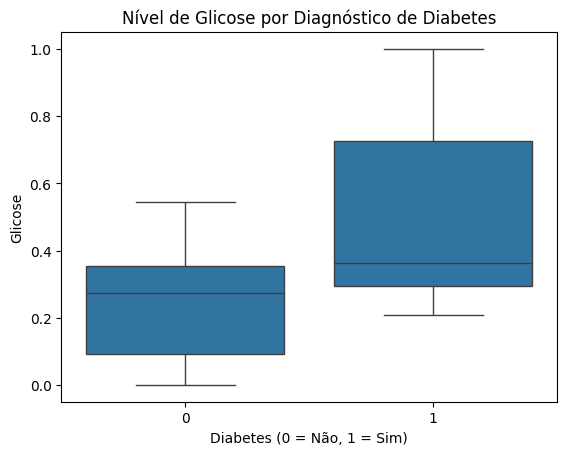

In [28]:
# Boxplot da glicose por presença de diabetes
sns.boxplot(data=tabela, x='diabetes', y='blood_glucose_level')
plt.title('Nível de Glicose por Diagnóstico de Diabetes')
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('Glicose')
plt.show()


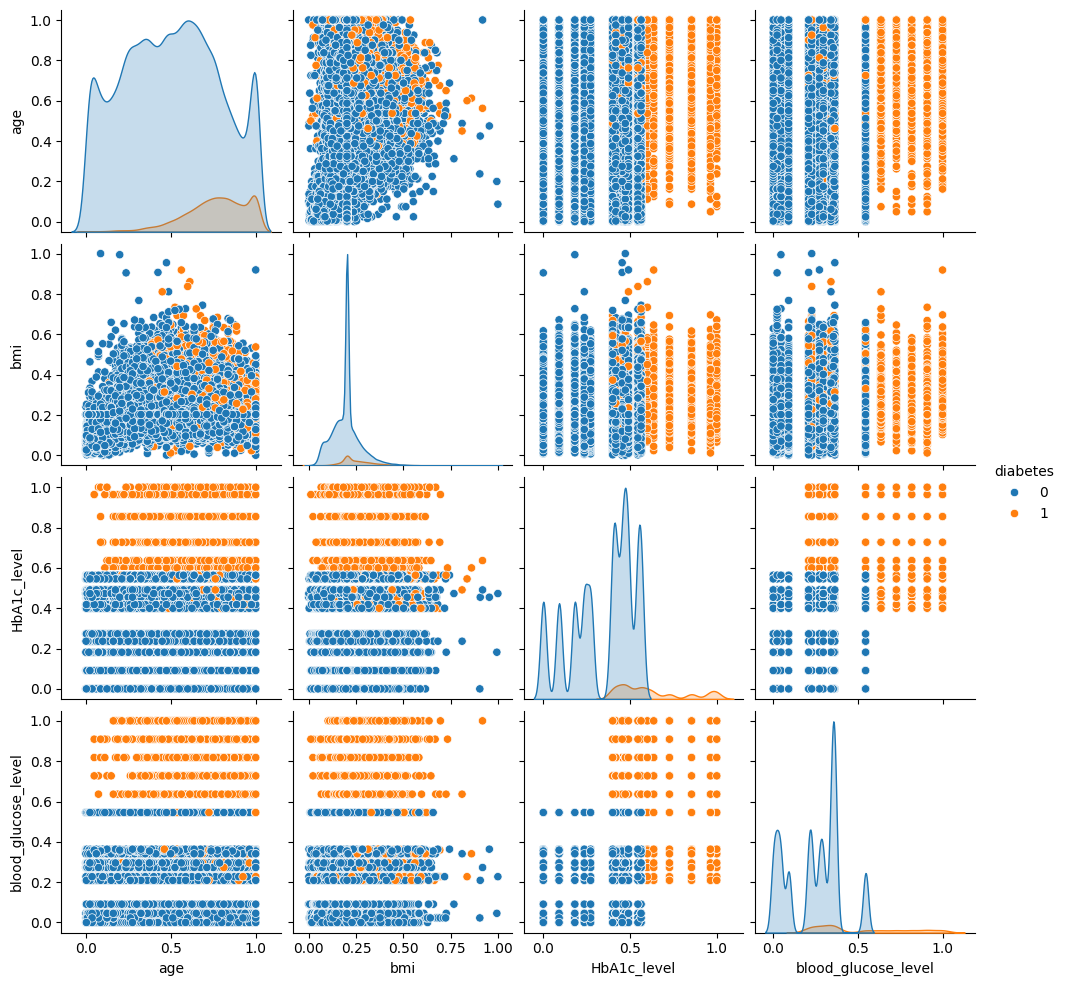

In [ ]:
# Pode demorar com muitos dados (no meu demorou 1 minuto)
sns.pairplot(tabela[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']], hue='diabetes')
plt.show()


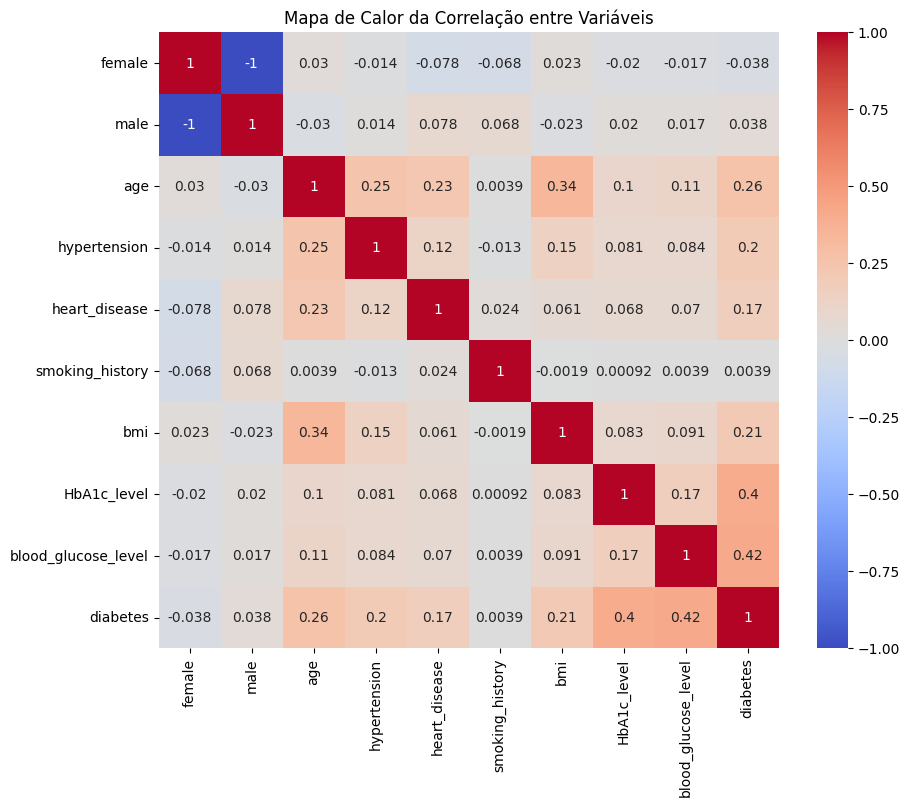

In [30]:
# Matriz de correlação
correlacao = tabela.corr(numeric_only=True)

# Heatmap da correlação
plt.figure(figsize=(10,8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor da Correlação entre Variáveis')
plt.show()


In [31]:
# Separa variáveis independentes e dependentes da tabela
Y = tabela['diabetes'].to_frame().to_numpy().T
X = tabela.drop(columns='diabetes').to_numpy().T
print(X.shape)
print(Y.shape)

(9, 99982)
(1, 99982)


In [32]:
parameters = nn_model(X, Y, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Custo após a interação 0: 0.693147
Custo após a interação 1000: 0.290827
Custo após a interação 2000: 0.288272
Custo após a interação 3000: 0.240063
Custo após a interação 4000: 0.156145
Custo após a interação 5000: 0.129911
Custo após a interação 6000: 0.122163
Custo após a interação 7000: 0.118932
Custo após a interação 8000: 0.117267
Custo após a interação 9000: 0.116319
W1 = [[ 3.04713224e-01  2.67059159e-01 -3.46612483e-01 -1.10202254e-01
  -8.78368837e-02 -1.16078991e-02 -4.46724440e-01 -9.94719681e-01
  -6.29233151e-01]
 [ 5.15214172e-01  4.87088484e-01 -4.25268962e-01 -1.02432547e-01
  -9.36176156e-02 -1.13924750e-03 -6.85640819e-01 -1.48186877e+00
  -8.88331105e-01]
 [-3.66077214e-01 -3.29290462e-01  3.72263412e-01  1.15076792e-01
   9.15897836e-02  5.63231460e-03  5.13930715e-01  1.13034312e+00
   7.04004695e-01]
 [-6.03334015e-01 -5.81626181e-01  4.47238416e-01  8.32199417e-02
   8.58801573e-02  2.34024250e-03  7.91785029e-01  1.69323587e+00
   9.95386978e-01]]
b1 = [[ 0.572